<a href="https://colab.research.google.com/github/Atyab-Alam/Python-programming-exercises/blob/master/Atyab_Alam_Playstore_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# a1 is for assignment 1 (Playstore)
a1 = pd.read_csv("/playstore-analysis (2) (1).csv")

In [35]:
a1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
# to check null records
a1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Task :- 1 ( Data clean up – Missing value treatment )

In [37]:
# Drop records where rating is missing since rating is our target/study variable
a1.dropna(how='any', subset=['Rating'], axis=0, inplace = True)
a1.Rating.isnull().sum()

0

In [38]:
# Check the null values for the Android Ver column.
# Are all 3 records having the same problem?
a1.loc[a1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Yes, all 3 records are having same problem i.e. all are NaN.**

In [39]:
# Drop the 3rd record i.e. record for “Life Made WIFI …”
a1.drop([10472], inplace = True)
a1.loc[a1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [40]:
# Replace remaining missing values with the mode
a1['Android Ver'].fillna(a1['Android Ver'].mode()[0], inplace=True)

In [41]:
# Current ver – replace with most common value
a1['Current Ver'].fillna(a1['Current Ver'].mode()[0], inplace=True)

# Task :- 2 ( Data clean up – correcting the data types )

In [42]:
# Which all variables need to be brought to numeric types?
a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


**Reviews and Installs need to be brought to numeric types.**

In [43]:
# Price variable – remove $ sign and convert to float
a1.drop(labels=a1[a1['Price']=='Everyone'].index, inplace = True)
a1['Price']= a1['Price'].apply(lambda x : float(x.replace('$','')))

In [44]:
# Installs – remove ‘,’ and ‘+’ sign, convert to integer
a1['Installs']= a1['Installs'].apply(lambda x : float(x.replace(',','').replace('+','')))

In [45]:
# Convert all other identified columns to numeric
a1['Reviews'] = a1.Reviews.astype(float)
a1['Installs'] = a1.Reviews.astype(float)

# Task :- 3 ( Sanity checks – check for the following and handle accordingly )

**a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.<br>
     i. Are there any such records? Drop if so.**

In [46]:
a1.loc[a1.Rating < 1] & a1.loc[a1.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no such records.

**b. Reviews should not be more than installs as only those who installed can review the
app.<br>
i. Are there any such records? Drop if so.**

In [47]:
a1.loc[a1['Reviews'] > a1['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**There is no such record in which Review is more than Installs.**

# Task :- 4 ( Identify and handle outliers )

**a. Price column**

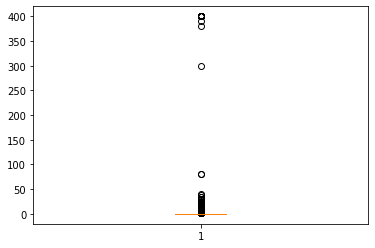

In [48]:
# Make suitable plot to identify outliers in price
plt.boxplot(a1.Price)
plt.show()

In [49]:
# Do you expect apps on the play store to cost $200? Check out these cases
a1.loc[a1['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,6.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,718.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,275.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,3547.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,856.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,411.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,1867.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,41.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,93.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,472.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


**Yes I can expect apps on the play store to cost $200**

In [50]:
# Limit data to records with price < $30
pr = a1[a1['Price'] > 30].index
a1.drop(labels=pr, inplace=True)

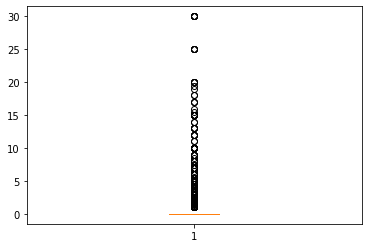

In [51]:
# After dropping the useless records, make the suitable plot again to identify outliers
plt.boxplot(a1.Price)
plt.show()

**b. Reviews column**

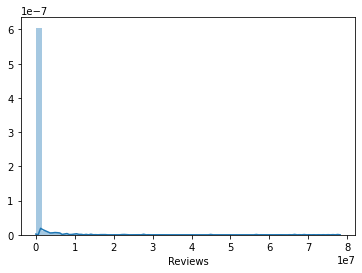

In [52]:
# Make suitable plot
sns.distplot(a1['Reviews'])
plt.show()
# histogram

In [53]:
# Limit data to apps with < 1 Million reviews
re = a1[a1['Reviews'] > 1000000 ].index
a1.drop(labels = re, inplace=True)

**c. Installs**

In [54]:
# What is the 95th percentile of the installs?
percentile = a1.Installs.quantile(0.95)
print(percentile,"is 95th percentile of Installs")

412888.0 is 95th percentile of Installs


In [55]:
# Drop records having a value more than the 95th percentile
temp = a1[a1["Installs"] > percentile].index
a1.drop(labels = temp)
print(temp.value_counts().sum(), "column drops")

432 column drops


# Data analysis to answer business questions

**5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower
values?**

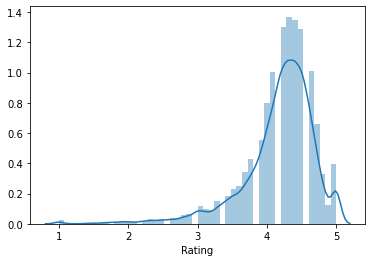

The skewness of this distribution is -1.7583226483231214
The Median of this distribution 4.3
The Mean 4.17313968290708 of this distribution


In [56]:
# How do you explain this?
sns.distplot(a1['Rating'])
plt.show()
print('The skewness of this distribution is',a1['Rating'].skew())
print('The Median of this distribution {}'.format(a1.Rating.median()))
print('The Mean {} of this distribution'.format(a1.Rating.mean()))

**What is the implication of this on your analysis?**<Br>
It is Negatively Skewed

**6. What are the top Content Rating values?**

In [57]:
# Are there any values with very few records?
a1['Content Rating'].value_counts()

Everyone           6949
Teen                934
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Adults only 18+ and Unrated are values with very few records.

In [58]:
# If yes, drop those as they won’t help in the analysis
cr = a1.loc[a1['Content Rating'] == 'Unrated'].index
a1.drop(labels=cr, inplace=True)

In [59]:
cr1 = a1.loc[a1['Content Rating'] == 'Adults only 18+'].index
a1.drop(labels=cr1, inplace=True)

In [60]:
a1['Content Rating'].value_counts()

Everyone        6949
Teen             934
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

**7. Effect of size on rating**

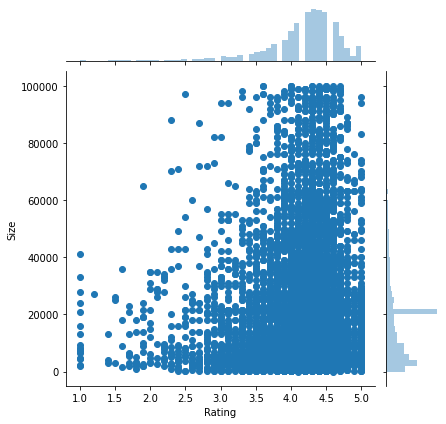

In [61]:
# Make a joinplot to understand the effect of size on rating
sns.jointplot(y ='Size', x ='Rating', data = a1, kind ='scatter')
plt.show()

**Do you see any patterns?**<Br>
Yes

**How do you explain the pattern?**<Br>
On increasing Rating, Size of App also increases.<Br>
Hence we can say that their is positive correlation between Size and Rating.

**8. Effect of price on rating**

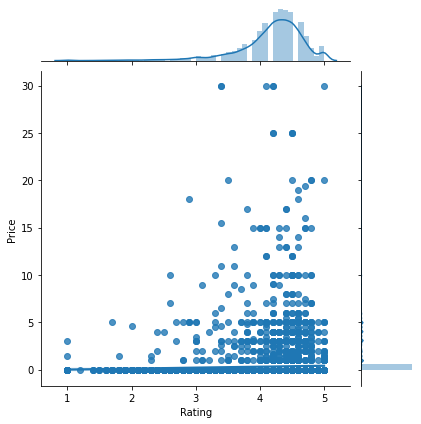

In [62]:
# Make a jointplot (with regression line)
sns.jointplot(y='Price', x='Rating', data= a1, kind='reg')
plt.show()

In [63]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8637 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8637 non-null   object 
 1   Category        8637 non-null   object 
 2   Rating          8637 non-null   float64
 3   Reviews         8637 non-null   float64
 4   Size            8637 non-null   float64
 5   Installs        8637 non-null   float64
 6   Type            8637 non-null   object 
 7   Price           8637 non-null   float64
 8   Content Rating  8637 non-null   object 
 9   Genres          8637 non-null   object 
 10  Last Updated    8637 non-null   object 
 11  Current Ver     8637 non-null   object 
 12  Android Ver     8637 non-null   object 
dtypes: float64(5), object(8)
memory usage: 944.7+ KB
